# Movie Recommendation System

## Aim - Suggest Movies similar to user entered movie using Similarity Matrix
#### Following steps will be followed for achieving the aim:
#### 1) Loading of IMDB movies Datasets ,merging data on basis of movie id, data cleaning and pre-processing.
#### 2) featurization with help of countvectorizer
#### 3) model building using cosine similarity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("movies_metadata.csv")
df.sample(5)

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
3153,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,9609,tt0105046,en,Of Mice and Men,"Two drifters, one a gentle but slow giant, try...",...,1992-09-16,5471088.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"We have a dream. Someday, we'll have a little ...",Of Mice and Men,False,7.1,147.0
31333,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,53648,tt0078963,it,Chiedo asilo,A new teacher introduces radical ideas at a nu...,...,1979-10-24,0.0,110.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Seeking Asylum,False,4.7,3.0
43933,False,NaN,1000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.abel-lapelicula.com/,54144,tt1479668,es,Abel,When 9-year-old Abel assumes his absent father...,...,2010-05-28,0.0,83.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Abel,False,6.7,11.0
5165,False,"{'id': 389767, 'name': 'My Big Fat Greek Weddi...",5000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,8346,tt0259446,en,My Big Fat Greek Wedding,A young Greek woman falls in love with a non-G...,...,2002-02-22,368744044.0,95.0,"[{'iso_639_1': 'el', 'name': 'ελληνικά'}, {'is...",Released,Love is here to stay... so is her family.,My Big Fat Greek Wedding,False,6.2,686.0
33669,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,32249,tt0214728,cn,Gong yuan 2000 AD,The Y2K Bug. Real Warfare vs Electronic Gaming...,...,2000-01-01,0.0,109.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN,2000 AD,False,6.7,9.0


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
df1=pd.read_csv("credits.csv")
df1

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [8]:
df1["id"]=df1["id"].astype("str")

In [9]:
df2=pd.read_csv("keywords.csv")
df2

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


# EDA and Pre-processing

In [11]:
df2["id"]=df2["id"].astype("str")

In [12]:
# for making tags from inflormation available we'll drop most of the numeric columns which are not usefull
# we'll keep genres, id imdb_id,original title,overview, title, cast and crew from credits.csv file,keywords.
# above mentioned columns are suitable for creating tags that are usefull to recommend movie on similarity.


In [13]:
mv=df.merge(df1.merge(df2,on="id"),on="id")
mv.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

In [14]:
mv=mv[['id','imdb_id','genres','title','overview','release_date','cast', 'crew', 'keywords']]
mv.head()

,id,imdb_id,genres,title,overview,release_date,cast,crew,keywords
0,862,tt0114709,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,tt0113497,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,tt0113228,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...,1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,tt0114885,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,tt0113041,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [15]:
mv["id"]=mv["id"].astype("int")

In [16]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            46628 non-null  int32 
 1   imdb_id       46611 non-null  object
 2   genres        46628 non-null  object
 3   title         46624 non-null  object
 4   overview      45633 non-null  object
 5   release_date  46540 non-null  object
 6   cast          46628 non-null  object
 7   crew          46628 non-null  object
 8   keywords      46628 non-null  object
dtypes: int32(1), object(8)
memory usage: 3.4+ MB


In [17]:
mv.duplicated().sum()

1189

In [18]:
mv.drop_duplicates(inplace=True)

In [19]:
mv.duplicated().sum()

0

In [20]:
mv.isnull().sum()

id                0
imdb_id          17
genres            0
title             3
overview        954
release_date     87
cast              0
crew              0
keywords          0
dtype: int64

In [21]:
mv.dropna(inplace=True)

In [22]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44399 entries, 0 to 46627
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            44399 non-null  int32 
 1   imdb_id       44399 non-null  object
 2   genres        44399 non-null  object
 3   title         44399 non-null  object
 4   overview      44399 non-null  object
 5   release_date  44399 non-null  object
 6   cast          44399 non-null  object
 7   crew          44399 non-null  object
 8   keywords      44399 non-null  object
dtypes: int32(1), object(8)
memory usage: 3.2+ MB


In [23]:
mv['release_date']=mv['release_date'].astype("str")

In [24]:
def year_update(x):
    if x[0:3]=="190":
        return "1900s"
    elif x[0:3]=="191":
        return "1910s"
    elif x[0:3]=="192":
        return "1920s"
    elif x[0:3]=="193":
        return "1930s"
    elif x[0:3]=="194":
        return "1940s"
    elif x[0:3]=="195":
        return "1950s"
    elif x[0:3]=="196":
        return "1960s"
    elif x[0:3]=="197":
        return "1970s"
    elif x[0:3]=="198":
        return "1980s"
    elif x[0:3]=="199":
        return "1990s"
    elif x[0:3]=="200":
        return "2000s"
    elif x[0:3]=="201":
        return "2010s"
    elif x[0:3]=="202":
        return "2020s"

In [25]:
mv["release_year"]=mv["release_date"].apply(year_update)

In [26]:
mv.sample(5)

,id,imdb_id,genres,title,overview,release_date,cast,crew,keywords,release_year
32017,161299,tt0075377,[],The Hired Gun,Fabio Testi is an undercover cop doubling as t...,1975-11-13,"[{'cast_id': 2, 'character': 'Marco Sartori', ...","[{'credit_id': '52fe4c41c3a36847f82254cd', 'de...",[],1970s
8488,36612,tt0034828,"[{'id': 18, 'name': 'Drama'}]",The Hard Way,"An ambitious woman doesn""t care who she hurts ...",1943-02-20,"[{'cast_id': 9, 'character': 'Mrs. Helen Chern...","[{'credit_id': '52fe45f99251416c91044c7b', 'de...","[{'id': 1415, 'name': 'small town'}, {'id': 60...",1940s
39487,125510,tt0161978,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",Slayers Great,"Lina and Naga, on their way to a town called S...",1997-08-02,"[{'cast_id': 4, 'character': 'Lina Inverse', '...","[{'credit_id': '5547a522c3a36856e5008b2d', 'de...","[{'id': 5147, 'name': 'sorcery'}, {'id': 10821...",1990s
13822,288035,tt0279176,"[{'id': 99, 'name': 'Documentary'}]","Kids in the Hall: Same Guys, New Dresses","A behind the scenes look at the comedy troupe,...",2001-03-02,[],"[{'credit_id': '53f6ba38c3a36833fa00493d', 'de...",[],2000s
14696,129417,tt0030055,"[{'id': 18, 'name': 'Drama'}]",The Childhood of Maxim Gorky,The Childhood of Maxim Gorky (Detstvo Gorkovo)...,1938-09-27,"[{'cast_id': 3, 'character': 'Aleksei Peshkov ...","[{'credit_id': '52fe4b3cc3a368484e17e917', 'de...",[],1930s


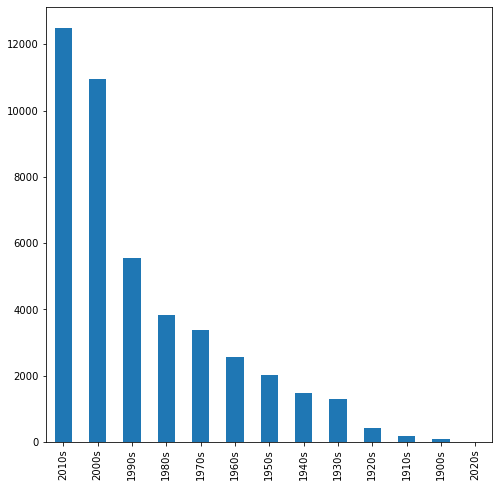

In [27]:
plt.figure(figsize=(8,8))
mv["release_year"].value_counts().plot(kind="bar")
plt.show()

In [28]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44399 entries, 0 to 46627
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            44399 non-null  int32 
 1   imdb_id       44399 non-null  object
 2   genres        44399 non-null  object
 3   title         44399 non-null  object
 4   overview      44399 non-null  object
 5   release_date  44399 non-null  object
 6   cast          44399 non-null  object
 7   crew          44399 non-null  object
 8   keywords      44399 non-null  object
 9   release_year  44319 non-null  object
dtypes: int32(1), object(9)
memory usage: 3.6+ MB


In [29]:
mv=mv[mv["keywords"]!="[]"]

In [30]:
mv=mv[mv["genres"]!="[]"]

In [31]:
mv=mv[mv["cast"]!="[]"]

In [32]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29711 entries, 0 to 46624
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            29711 non-null  int32 
 1   imdb_id       29711 non-null  object
 2   genres        29711 non-null  object
 3   title         29711 non-null  object
 4   overview      29711 non-null  object
 5   release_date  29711 non-null  object
 6   cast          29711 non-null  object
 7   crew          29711 non-null  object
 8   keywords      29711 non-null  object
 9   release_year  29679 non-null  object
dtypes: int32(1), object(9)
memory usage: 2.4+ MB


In [33]:
mv.head()

,id,imdb_id,genres,title,overview,release_date,cast,crew,keywords,release_year
0,862,tt0114709,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1990s
1,8844,tt0113497,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1990s
2,15602,tt0113228,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...,1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1990s
3,31357,tt0114885,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",1990s
4,11862,tt0113041,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",1990s


In [34]:
mv.loc[0,"genres"]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [35]:
#dictionaries are in list and entire list is string
import ast
def get_values(x):
    l=[]
    for i in ast.literal_eval(x):
        l.append(i["name"])
    return l

In [36]:
mv["genres"]=mv["genres"].apply(get_values)

In [37]:
mv.head()

,id,imdb_id,genres,title,overview,release_date,cast,crew,keywords,release_year
0,862,tt0114709,"[Animation, Comedy, Family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1990s
1,8844,tt0113497,"[Adventure, Fantasy, Family]",Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",1990s
2,15602,tt0113228,"[Romance, Comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1990s
3,31357,tt0114885,"[Comedy, Drama, Romance]",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",1990s
4,11862,tt0113041,[Comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",1990s


In [38]:
mv.loc[1,"keywords"]

'[{\'id\': 10090, \'name\': \'board game\'}, {\'id\': 10941, \'name\': \'disappearance\'}, {\'id\': 15101, \'name\': "based on children\'s book"}, {\'id\': 33467, \'name\': \'new home\'}, {\'id\': 158086, \'name\': \'recluse\'}, {\'id\': 158091, \'name\': \'giant insect\'}]'

In [39]:
mv["keywords"]=mv["keywords"].apply(get_values)

In [40]:
mv.head()

,id,imdb_id,genres,title,overview,release_date,cast,crew,keywords,release_year
0,862,tt0114709,"[Animation, Comedy, Family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",1990s
1,8844,tt0113497,"[Adventure, Fantasy, Family]",Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",1990s
2,15602,tt0113228,"[Romance, Comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",1990s
3,31357,tt0114885,"[Comedy, Drama, Romance]",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",1990s
4,11862,tt0113041,[Comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",1990s


In [41]:
mv.loc[1,"cast"]
# we'll take only top 5 actors

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [42]:
def get_names(x):
    l=[]
    cnt=0
    for i in ast.literal_eval(x):
        if cnt!=5:
            l.append(i["name"])
            cnt+=1
        else:
            break
    return l

In [43]:
mv["cast"]=mv["cast"].apply(get_names)

In [44]:
mv.loc[1,"cast"]

['Robin Williams',
 'Jonathan Hyde',
 'Kirsten Dunst',
 'Bradley Pierce',
 'Bonnie Hunt']

In [45]:
mv.loc[1,"crew"]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [46]:
def get_dir(x):
    l=[]
    for i in ast.literal_eval(x):
        if i["job"]=="Director":
            l.append(i["name"])
            break
    return l

In [47]:
mv["crew"]=mv["crew"].apply(get_dir)

In [48]:
mv.loc[1,"crew"]

['Joe Johnston']

In [49]:
mv.loc[2,"overview"]

"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max."

In [50]:
def get_list(x):
    return x.split()

In [51]:
mv["overview"]=mv["overview"].apply(get_list)

In [52]:
mv.loc[2,"overview"]

['A',
 'family',
 'wedding',
 'reignites',
 'the',
 'ancient',
 'feud',
 'between',
 'next-door',
 'neighbors',
 'and',
 'fishing',
 'buddies',
 'John',
 'and',
 'Max.',
 'Meanwhile,',
 'a',
 'sultry',
 'Italian',
 'divorcée',
 'opens',
 'a',
 'restaurant',
 'at',
 'the',
 'local',
 'bait',
 'shop,',
 'alarming',
 'the',
 'locals',
 'who',
 'worry',
 "she'll",
 'scare',
 'the',
 'fish',
 'away.',
 'But',
 "she's",
 'less',
 'interested',
 'in',
 'seafood',
 'than',
 'she',
 'is',
 'in',
 'cooking',
 'up',
 'a',
 'hot',
 'time',
 'with',
 'Max.']

In [53]:
mv.drop("release_date",axis=1,inplace=True)

In [54]:
mv.head()

,id,imdb_id,genres,title,overview,cast,crew,keywords,release_year
0,862,tt0114709,"[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva...",1990s
1,8844,tt0113497,"[Adventure, Fantasy, Family]",Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'...",1990s
2,15602,tt0113228,"[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o...",1990s
3,31357,tt0114885,"[Comedy, Drama, Romance]",Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin...",1990s
4,11862,tt0113041,[Comedy],Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug...",1990s


In [55]:
mv["overview"]=mv["overview"].apply(lambda x:[i.replace(" ","") for i in x])

In [56]:
mv["cast"]=mv["cast"].apply(lambda x:[i.replace(" ","") for i in x])

In [57]:
mv.loc[0,"cast"]

['TomHanks', 'TimAllen', 'DonRickles', 'JimVarney', 'WallaceShawn']

In [58]:
mv["crew"]=mv["crew"].apply(lambda x:[i.replace(" ","") for i in x])

In [59]:
mv["keywords"]=mv["keywords"].apply(lambda x:[i.replace(" ","") for i in x])

In [60]:
mv["genres"]=mv["genres"].apply(lambda x:[i.replace(" ","") for i in x])

In [61]:
mv.shape

(29711, 9)

In [63]:
mv=mv[(mv["release_year"]=="1970s") + (mv["release_year"]=="1980s") + (mv["release_year"]=="1990s")+(mv["release_year"]=="2000s") + (mv["release_year"]=="2010s") + (mv["release_year"]=="2020s")]

In [64]:
mv.head()

,id,imdb_id,genres,title,overview,cast,crew,keywords,release_year
0,862,tt0114709,"[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...",1990s
1,8844,tt0113497,"[Adventure, Fantasy, Family]",Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",1990s
2,15602,tt0113228,"[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",1990s
3,31357,tt0114885,"[Comedy, Drama, Romance]",Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...",1990s
4,11862,tt0113041,[Comedy],Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...",1990s


In [65]:
mv.shape

(23410, 9)

In [66]:
def ret_list(x):
    return [x]

In [67]:
ret_list("1990s")

['1990s']

In [68]:
mv["release_year"]=mv["release_year"].apply(ret_list)

In [69]:
mv["tags"]=mv["genres"]+mv['overview']+mv["cast"]+mv["crew"]+mv["keywords"]+mv['release_year']

In [70]:
mv.head()

,id,imdb_id,genres,title,overview,cast,crew,keywords,release_year,tags
0,862,tt0114709,"[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...",[1990s],"[Animation, Comedy, Family, Led, by, Woody,, A..."
1,8844,tt0113497,"[Adventure, Fantasy, Family]",Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",[1990s],"[Adventure, Fantasy, Family, When, siblings, J..."
2,15602,tt0113228,"[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",[1990s],"[Romance, Comedy, A, family, wedding, reignite..."
3,31357,tt0114885,"[Comedy, Drama, Romance]",Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...",[1990s],"[Comedy, Drama, Romance, Cheated, on,, mistrea..."
4,11862,tt0113041,[Comedy],Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...",[1990s],"[Comedy, Just, when, George, Banks, has, recov..."


In [71]:
newmv=mv.drop(columns=["genres","overview","cast","crew","keywords","release_year"])

In [72]:
newmv.sample(5)

,id,imdb_id,title,tags
44249,409820,tt2976152,The Lost World of Communism,"[Documentary, 1989, marked, the, collapse, of,..."
45847,45764,tt0066820,Handicapped Future,"[Documentary, A, documentary, by, Werner, Herz..."
43843,238442,tt0467694,Lunch Box,"[Romance, Drama, The, film, tells, the, story,..."
43971,433356,tt4943322,The Ottoman Lieutenant,"[Romance, Drama, War, Lillie,, a, determined, ..."
41227,407887,tt4939066,Operation Chromite,"[History, Drama, War, Action, A, squad, of, so..."


In [73]:

def tostr(txt):
    l=' '.join([str(elem) for elem in txt])
    return l

In [74]:
tostr(['A',
 'family',
 'wedding',
 'reignites',
 'the',
 'ancient',
 'feud',
 'between',
 'next-door',
 'neighbors',
 'and',
 'fishing',
 'buddies',
 'John',
 'and',
 'Max.',
 'Meanwhile,',
 'a',
 'sultry',
 'Italian',
 'divorcée',
 'opens',
 'a',
 'restaurant',
 'at',
 'the',
 'local',
 'bait',
 'shop,',
 'alarming',
 'the',
 'locals',
 'who',
 'worry',
 "she'll",
 'scare',
 'the',
 'fish',
 'away.',
 'But',
 "she's",
 'less',
 'interested',
 'in',
 'seafood',
 'than',
 'she',
 'is',
 'in',
 'cooking',
 'up',
 'a',
 'hot',
 'time',
 'with',
 'Max.'])

"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max."

In [75]:
newmv["tags"]=newmv["tags"].apply(tostr)

In [76]:
newmv.sample(5)

,id,imdb_id,title,tags
18671,101520,tt1484114,Reel Injun,Documentary The history of the depiction of Na...
10235,276,tt0408777,The Edukators,Drama Comedy Three activists cobble together a...
28887,85511,tt0078928,California Dreaming,Comedy Drama Romance Young T.T. comes from Chi...
11485,11619,tt0424095,Flushed Away,Adventure Animation Comedy Family London high-...
33199,98027,tt0068415,Seven Dead in the Cat's Eye,Crime Horror Mystery Thriller In a small Scott...


In [77]:
newmv["tags"]=newmv["tags"].apply(lambda x:x.lower())

In [78]:
newmv.head(5)

,id,imdb_id,title,tags
0,862,tt0114709,Toy Story,"animation comedy family led by woody, andy's t..."
1,8844,tt0113497,Jumanji,adventure fantasy family when siblings judy an...
2,15602,tt0113228,Grumpier Old Men,romance comedy a family wedding reignites the ...
3,31357,tt0114885,Waiting to Exhale,"comedy drama romance cheated on, mistreated an..."
4,11862,tt0113041,Father of the Bride Part II,comedy just when george banks has recovered fr...


In [79]:
newmv.reset_index(inplace=True)

In [80]:
# to avoid repeated similar words in bag of words we can use stemming,which combines similar words to rood word.
import nltk

In [81]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [82]:
def root_word(x):
    l=[]
    for i in x.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [83]:
root_word("A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.")

"a famili wed reignit the ancient feud between next-door neighbor and fish buddi john and max. meanwhile, a sultri italian divorcé open a restaur at the local bait shop, alarm the local who worri she'll scare the fish away. but she' less interest in seafood than she is in cook up a hot time with max."

In [84]:
newmv["tags"]=newmv["tags"].apply(root_word)

In [85]:
newmv.iloc[862].tags

"comedi crime drama set in the 1930' thi intric caper deal with an ambiti small-tim crook and a veteran con man who seek reveng on a viciou crime lord who murder one of their gang. paulnewman robertredford robertshaw charlesdurn raywalston georgeroyhil chicago bet horserac repay conman mafiaboss violenc ragtim referencetomuttandjeff offtrackbet stingoper alley 1930 20thcenturi 1970"

# Featurization

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000,stop_words="english")

In [87]:
vec=cv.fit_transform(newmv["tags"]).toarray()

In [88]:
vec[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
len(cv.get_feature_names())

2000

In [90]:
vec.shape

(23410, 2000)

# Model Building

In [91]:
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
sim=cosine_similarity(vec)

In [93]:
sim.shape

(23410, 23410)

In [94]:
len(sim)

23410

In [95]:
l=[]
for i in range(len(sim)):
    l.append(sorted(list(enumerate(sim[i])),reverse=True, key = lambda x:x[1])[1:6])
simm=np.array(l)


In [96]:
simm.shape

(23410, 5, 2)

In [97]:
simm[10]

array([[1.86810000e+04, 4.25628265e-01],
       [5.72700000e+03, 3.93625090e-01],
       [1.33690000e+04, 3.92274066e-01],
       [9.00000000e+03, 3.91304348e-01],
       [1.90650000e+04, 3.88710612e-01]])

In [98]:
def recommend(movie):
    idx=newmv[newmv["title"]==movie].index[0]
    for i in simm[idx]:
        print(newmv.loc[i[0]].title)

In [99]:
recommend("Bad Boys")

Bad Boys II
Veteran
Fire with Fire
Ace Ventura: Pet Detective
Miami Blues


In [100]:
import pickle

In [101]:
pickle.dump(newmv,open("mvlist.pkl","wb"))


In [102]:
pickle.dump(simm,open("similarity.pkl","wb"))